In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
temp = pd.read_csv(
    f"./names/yob1880.txt", header=None, names=["Name", "Gender", "Count"]
)
temp.head(5)

,Name,Gender,Count
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [3]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    2000 non-null   object
 1   Gender  2000 non-null   object
 2   Count   2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [4]:
years = list(range(1880, 2019))

In [5]:
dfs = []

for year in years:
    df = pd.read_csv(
        f"./names/yob{year}.txt", header=None, names=["Name", "Gender", "Count"]
    )
    dfs.append(df)

In [6]:
df_names = pd.concat(dfs, keys=years, names=["Year"]).droplevel(-1).reset_index()
df_names.sample(5)

,Year,Name,Gender,Count
792530,1976,Coral,F,67
415041,1945,Patsie,F,12
353031,1938,Lassie,F,5
534277,1956,Leighton,M,47
1043039,1988,Rolondo,M,8


In [7]:
temp = pd.read_csv(
    f"./namesbystate/AK.TXT",
    header=None,
    names=["State", "Gender", "Year", "Name", "Count"],
)
temp.head(5)

,State,Gender,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [8]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28528 entries, 0 to 28527
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   28528 non-null  object
 1   Gender  28528 non-null  object
 2   Year    28528 non-null  int64 
 3   Name    28528 non-null  object
 4   Count   28528 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [9]:
dfs = []

for filename in glob(f"./namesbystate/*.TXT"):
    df = pd.read_csv(
        f"{filename}", header=None, names=["State", "Gender", "Year", "Name", "Count"]
    ).reset_index(drop=True)
    dfs.append(df)

In [10]:
df_states = pd.concat(dfs, axis=0)
df_states.sample(5)

,State,Gender,Year,Name,Count
15162,TX,F,1926,Lidia,25
36688,IA,F,1994,Mckenna,11
65867,AL,F,2012,Sadie,54
165938,FL,M,1996,Dandre,30
5120,VA,F,1922,Faye,18


In [11]:
df_states["State"] = df_states["State"].astype("category")
df_states["Gender"] = df_states["Gender"].astype("category")

In [12]:
filt = df_names["Gender"] == "F"
df_names.loc[filt, :].nlargest(10, "Count")

,Year,Name,Gender,Count
431066,1947,Linda,F,99689
441437,1948,Linda,F,96211
451678,1949,Linda,F,91016
461947,1950,Linda,F,80431
180209,1921,Mary,F,73985
472250,1951,Linda,F,73978
212465,1924,Mary,F,73534
191066,1922,Mary,F,72173
431067,1947,Mary,F,71687
201822,1923,Mary,F,71638


In [13]:
filt = df_names["Gender"] == "M"
df_names.loc[filt, :].nlargest(10, "Count")

,Year,Name,Gender,Count
437169,1947,James,M,94757
544630,1957,Michael,M,92704
437170,1947,Robert,M,91640
533165,1956,Michael,M,90656
556204,1958,Michael,M,90517
447478,1948,James,M,88584
510812,1954,Michael,M,88528
521887,1955,Michael,M,88327
437171,1947,John,M,88319
427047,1946,James,M,87436


In [14]:
def most_popular(year, gender, n):
    filt = (df_names["Year"] == year) & (df_names["Gender"] == gender)
    return df_names.loc[filt, :].nlargest(n, "Count")

In [15]:
df_2018 = most_popular(2018, "M", 20)
df_2018

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


In [16]:
df_1880 = most_popular(1880, "M", 20)
df_1880

,Year,Name,Gender,Count
942,1880,John,M,9655
943,1880,William,M,9532
944,1880,James,M,5927
945,1880,Charles,M,5348
946,1880,George,M,5126
947,1880,Frank,M,3242
948,1880,Joseph,M,2632
949,1880,Thomas,M,2534
950,1880,Henry,M,2444
951,1880,Robert,M,2415


In [17]:
df_2018[["Name", "Count"]].merge(
    df_1880[["Name", "Count"]], how="inner", on="Name", suffixes=["_2018", "_1880"]
)

,Name,Count_2018,Count_1880
0,William,14516,9532
1,James,13525,5927
2,Henry,10649,2444


In [18]:
df_2018 = most_popular(2018, "F", 20)
df_1880 = most_popular(1880, "F", 20)
df_2018[["Name", "Count"]].merge(
    df_1880[["Name", "Count"]], how="inner", on="Name", suffixes=["_2018", "_1880"]
)

,Name,Count_2018,Count_1880
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


In [19]:
agg = df.groupby(["Name", "Gender"]).agg(
    Total=("Count", "sum"),
    No_Year=("Count", "count"),
    First_Year=("Year", "min"),
    Last_Year=("Year", "max"),
    Max_Count=("Count", "max"),
)
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaliyah,F,54,8,2010,2018,11
Aaron,M,1123,52,1961,2016,61
Abby,F,99,15,1978,2004,9
Abel,M,58,7,2012,2018,13
Abigail,F,553,33,1980,2018,29
...,...,...,...,...,...,...
Zayden,M,41,6,2009,2018,9
Zayne,M,5,1,2012,2012,5
Zella,F,5,1,1913,1913,5


In [20]:
result = agg[agg.index.get_level_values("Gender") == "F"].nlargest(10, "Total")
result

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Mary,F,6175,97,1910,2014,149
Jennifer,F,2715,54,1947,2003,184
Linda,F,2627,45,1936,1985,229
Patricia,F,2497,75,1915,1993,95
Barbara,F,2459,69,1916,1994,96
Elizabeth,F,2346,109,1910,2018,55
Betty,F,2181,52,1914,1973,118
Margaret,F,1971,77,1910,2018,68
Susan,F,1941,49,1937,1986,107


In [21]:
result = agg[agg.index.get_level_values("Gender") == "M"].nlargest(10, "Total")
result

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Robert,M,9031,109,1910,2018,187
John,M,8619,109,1910,2018,184
James,M,8103,109,1910,2018,177
Michael,M,7189,90,1916,2018,186
William,M,6673,109,1910,2018,135
David,M,6225,106,1913,2018,194
Richard,M,4689,99,1911,2018,137
Charles,M,4035,109,1910,2018,93
Thomas,M,3571,108,1910,2018,93


In [22]:
agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total")).reset_index(level=-1)

Gender  Total  No_Year  First_Year  Last_Year  Max_Count
Gender Name                                                                
F      Mary             F   6175       97        1910       2014        149
       Jennifer         F   2715       54        1947       2003        184
       Linda            F   2627       45        1936       1985        229
       Patricia         F   2497       75        1915       1993         95
       Barbara          F   2459       69        1916       1994         96
       Elizabeth        F   2346      109        1910       2018         55
       Betty            F   2181       52        1914       1973        118
       Margaret         F   1971       77        1910       2018         68
       Susan            F   1941       49        1937       1986        107
       Jessica          F   1929       38        1965       2008        138
M      Robert           M   9031      109        1910       2018        187
       John             M   8619      109        1910       2018        184
       James            M   8103      109        1910       2018        177
       Michael          M   7189       90        1916       2018        186
       William          M   6673      109        1910       2018        135
       David            M   6225      106        1913       2018        194
       Richard          M   4689       99        1911       2018        137
       Charles          M   4035      109        1910       2018         93
       Thomas           M   3571      108        1910       2018         93
       Christopher      M   3175       70        1948       2018        162

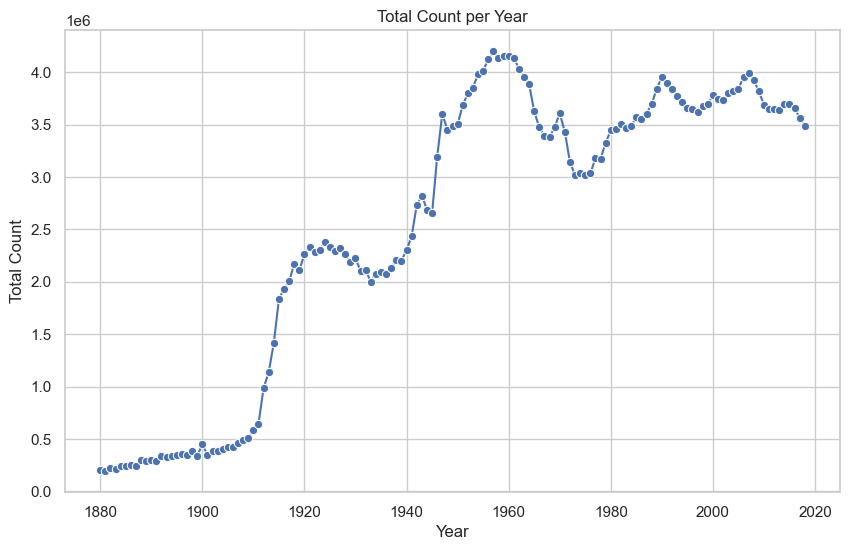

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sum_counts_per_year = df_names.groupby("Year")["Count"].sum().reset_index()

sns.lineplot(data=sum_counts_per_year, x="Year", y="Count", marker="o")

plt.title("Total Count per Year")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.show()

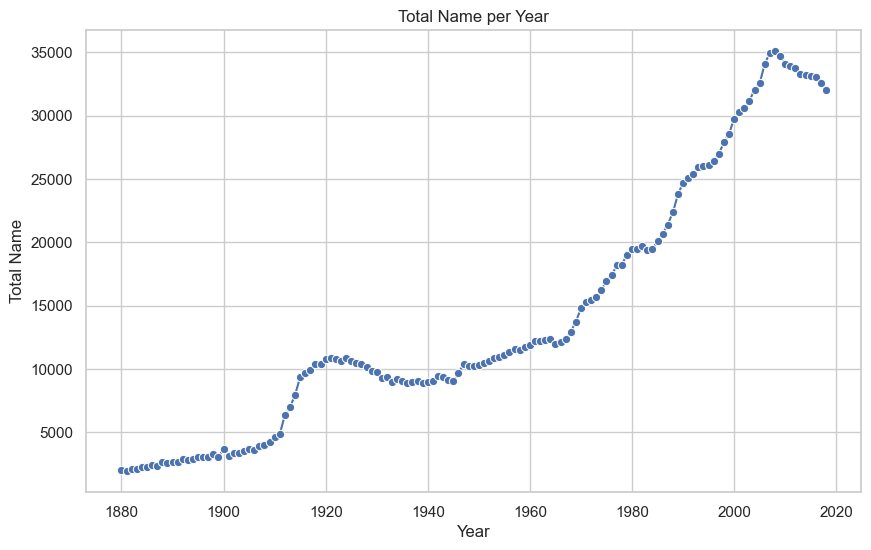

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sum_counts_per_year = df_names.groupby("Year")["Name"].count().reset_index()

sns.lineplot(data=sum_counts_per_year, x="Year", y="Name", marker="o")

plt.title("Total Name per Year")
plt.xlabel("Year")
plt.ylabel("Total Name")
plt.show()